In [1]:
# Imports
import investpy
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime 
import hvplot.pandas


In [2]:
# Create wheat dataframe
wheat_df = investpy.get_commodity_historical_data(
                                                  commodity='US Wheat',
                                                  country = 'united states',
                                                  from_date='01/01/2012', 
                                                   to_date='01/01/2022')
wheat_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
wheat_df.rename(columns = {'Close': 'wheat'}, inplace=True)

In [3]:
wheat_df.head()

wheat
Date              
2012-01-02  653.13
2012-01-03  658.38
2012-01-04  650.13
2012-01-05  627.38
2012-01-06  624.63

In [4]:
# Create dollar index dataframe
dollar_df = investpy.get_index_historical_data(
                                               index = 'US Dollar Index',
                                               country = 'united states',
                                               from_date = '01/01/2012',
                                               to_date = '01/01/2022'
                                               )
dollar_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
dollar_df.rename(columns = {'Close': 'Dollar'}, inplace=True)


In [5]:
dollar_df.head()

Dollar
Date              
2012-01-02   80.18
2012-01-03   79.61
2012-01-04   80.13
2012-01-05   80.94
2012-01-06   81.25

In [6]:
# Create VIX dataframe 
vix_df = investpy.get_index_historical_data(
                                            index = 'S&P 500 VIX',
                                            country = 'united states',
                                            from_date = '01/01/2012',
                                            to_date = '01/01/2022')
vix_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
vix_df.rename(columns = {'Close': 'VIX'}, inplace = True)

In [7]:
vix_df.head()

VIX
Date             
2012-01-03  22.97
2012-01-04  22.22
2012-01-05  21.48
2012-01-06  20.63
2012-01-09  21.07

In [8]:
# Crude oil dataframe
crude_df = investpy.get_commodity_historical_data(
                                       commodity='Crude Oil WTI',
                                       country = 'united states',
                                       from_date='01/01/2012', 
                                       to_date='01/01/2022')
crude_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
crude_df.rename(columns = {'Close': 'Crude'}, inplace = True)

In [9]:
crude_df.head()

Crude
Date              
2012-01-03  102.96
2012-01-04  103.22
2012-01-05  101.81
2012-01-06  101.56
2012-01-09  101.31

In [10]:
# Carbon futures dataframe
carbon_df = pd.read_csv("C:\\Users\\eszczepalink\\Downloads\\Carbon Emissions Futures Historical Data.csv",parse_dates=True,
                       infer_datetime_format=True,index_col='Date')
carbon_df.drop(['Open','High','Low','Vol.','Change %'], axis=1,inplace=True)
carbon_df.rename(columns = {'Price':'Carbon Futures'},inplace=True)#.set_index('Date',inplace=True)

In [11]:
combined_df = pd.concat([wheat_df,dollar_df,vix_df,crude_df,carbon_df], axis=1, join='inner')
combined_df

wheat  Dollar    VIX   Crude  Carbon Futures
Date                                                     
2012-01-03  658.38   79.61  22.97  102.96            6.28
2012-01-04  650.13   80.13  22.22  103.22            6.27
2012-01-05  627.38   80.94  21.48  101.81            6.43
2012-01-06  624.63   81.25  20.63  101.56            6.30
2012-01-09  642.38   81.05  21.07  101.31           11.00
...            ...     ...    ...     ...             ...
2021-12-27  804.00   96.09  17.68   75.57           76.92
2021-12-28  783.50   96.20  17.54   75.98           79.29
2021-12-29  787.75   95.93  16.95   76.56           80.36
2021-12-30  779.75   95.97  17.33   76.99           80.16
2021-12-31  770.75   95.97  17.22   75.21           80.65

[2506 rows x 5 columns]

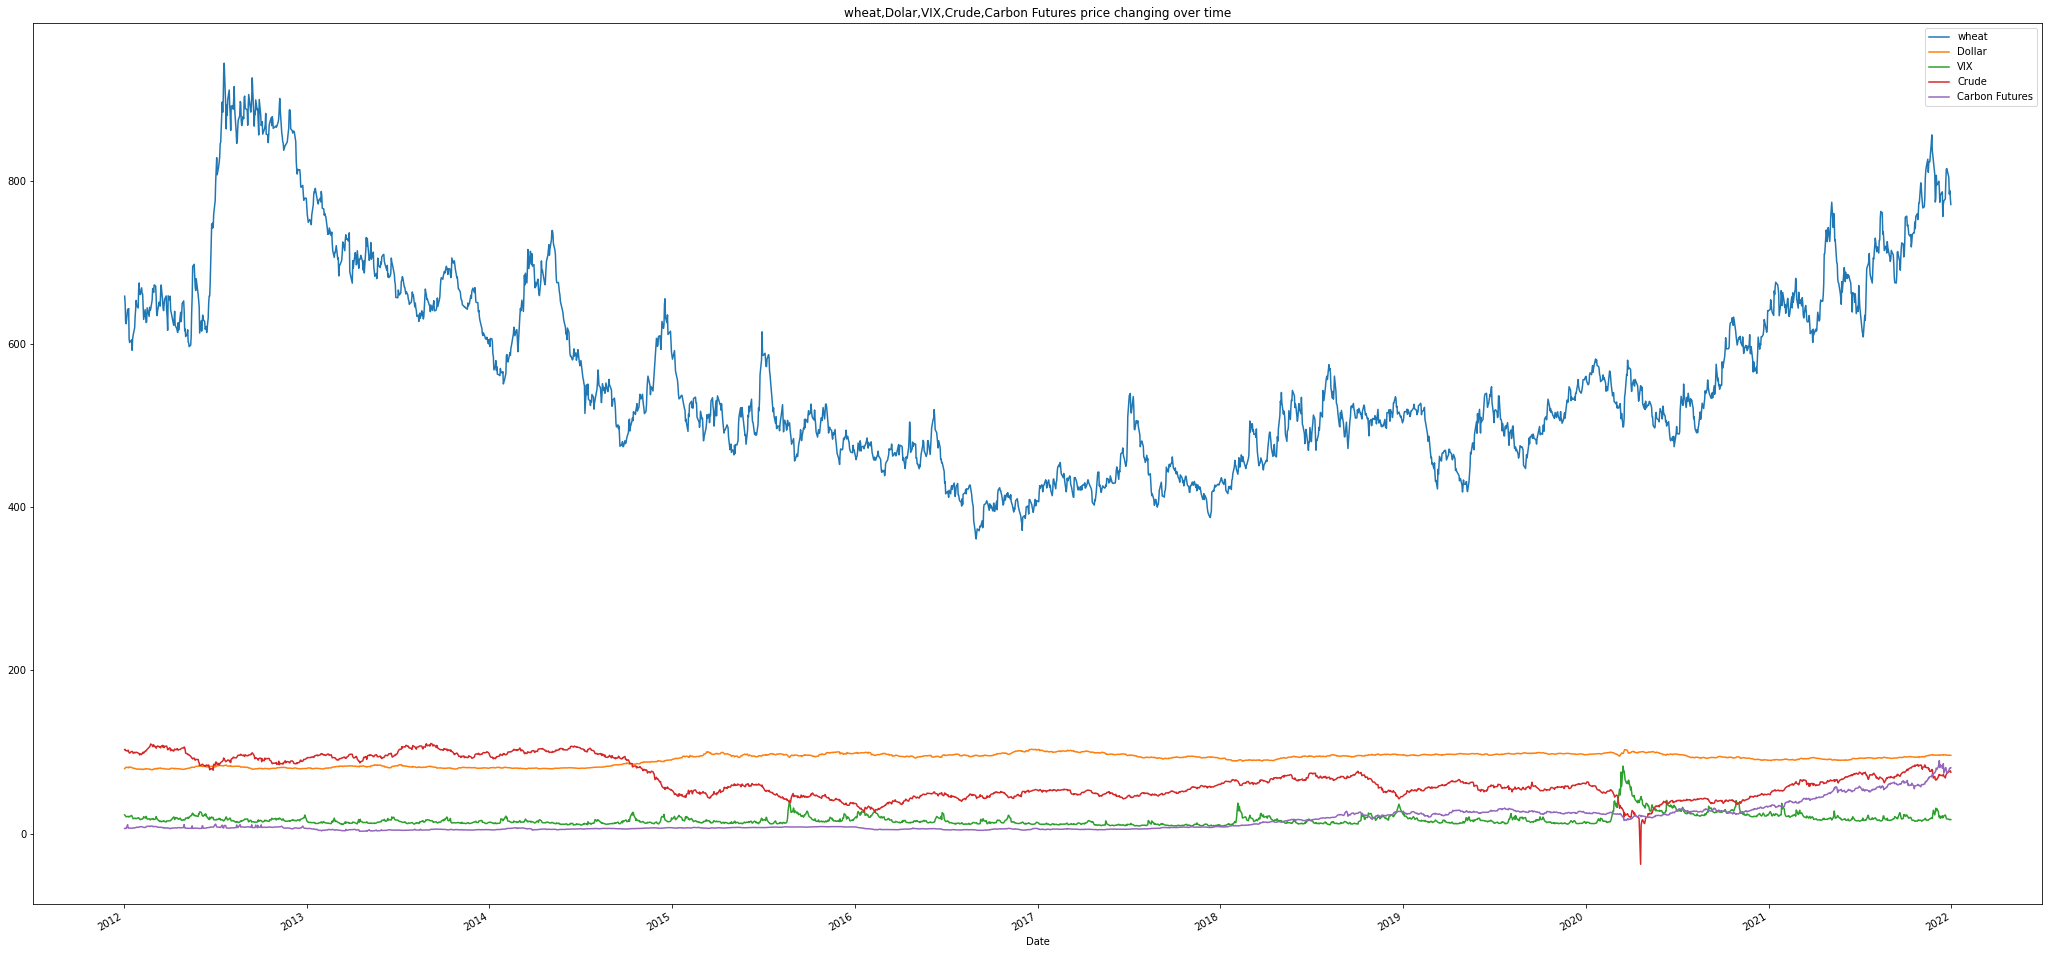

In [12]:
combined_df.plot.line(figsize=(36,18),title="wheat,Dolar,VIX,Crude,Carbon Futures price changing over time")
plt.show()

In [13]:
returns_df = combined_df.pct_change().dropna()

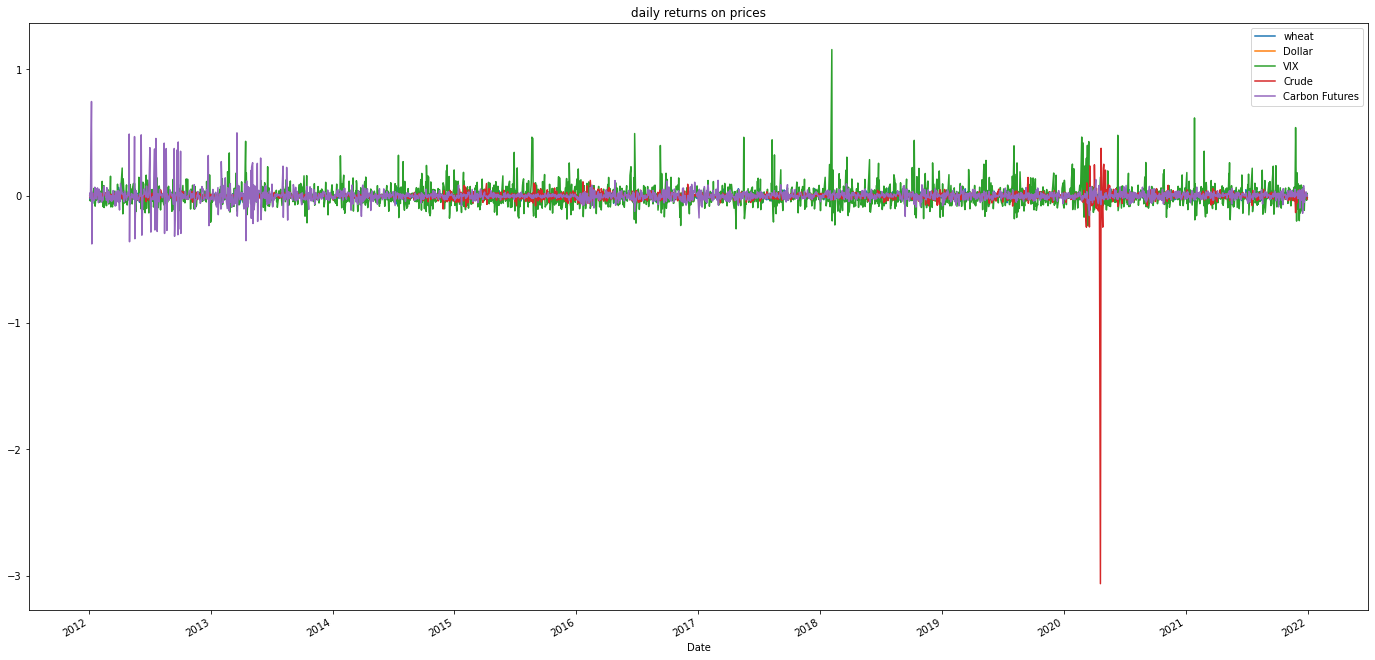

In [14]:
returns_df.plot.line(figsize=(24,12),title="daily returns on prices")
plt.show()

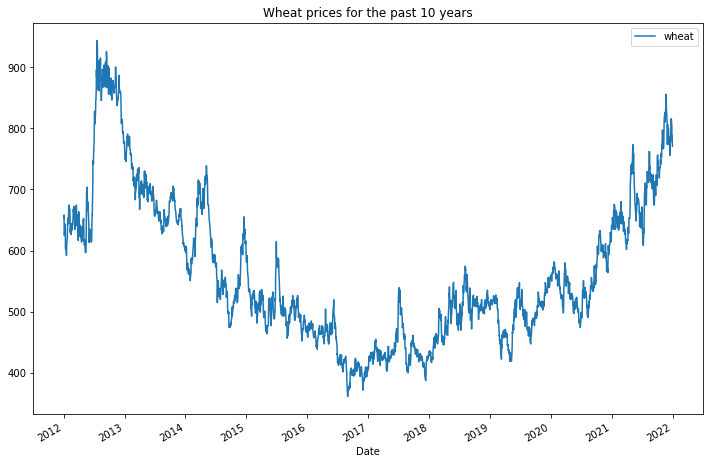

In [15]:
wheat_df.plot(figsize=(12,8),
              title="Wheat prices for the past 10 years",
              
              
             )
plt.show()

In [47]:
'''
The diagram show the wheat price has fallen to lowest in 16-17 than for the past years
The bushel has traded $2.8 in 2016 which was traded to $7.6 in 2006
2012/2013 the wheat showed its higest pick in 10 years interval, since then the trade showed drop in price espacially in 2017 pe
-riod for so many reasons:
1.Russia annexed crimea caused a disruption of Global wheal supply in 2014 to control the black Sea which is the port to export 
the wheat out of Ukraine which is the fifth largest wheat exporter.
2.During of 15/16 period US was expected to ship less wheat than Canada.
3.The weaken of dollar value between 2014 to 2018 and drought resulting of drop wheat prices because dollar and agricultural 
commodity prices are negatively correlated.
4.US faced slow down on exports of their wheat supply due the increased competition from cheaper supplies from Argentina,The
Black sea and Europe.
5.The Trade war between china and US that has occured in 2017 the US farmers got hit so badly by China higest price on products 
as seeds, fertilizers, equipments.
5.2018 winter drought caused US farmer to produce less wheat for the export
After March 2020 the graph showed a bit a slowdown on wheat prices due the pandemic but after that it showed a steady growth

The wheat market is projecting a CAGR of 4.5% of period 2022/2027 under a new restrictions when supply chain got disrupted the 
supply of wheat reduced.
'''

'\nThe diagram show the wheat price has fallen to lowest in 16-17 than for the past years\nThe bushel has traded $2.8 in 2016 which was traded to $7.6 in 2006\n2012/2013 the wheat showed its higest pick in 10 years interval, since then the trade showed drop in price espacially in 2017 pe\n-riod for so many reasons:\n1.Russia annexed crimea caused a disruption of Global wheal supply in 2014 to control the black Sea which is the port to export \nthe wheat out of Ukraine which is the fifth largest wheat exporter.\n2.During of 15/16 period US was expected to ship less wheat than Canada.\n3.The weaken of dollar value between 2014 to 2018 and drought resulting of drop wheat prices because dollar and agricultural \ncommodity prices are negatively correlated.\n4.US faced slow down on exports of their wheat supply due the increased competition from cheaper supplies from Argentina,The\nBlack sea and Europe.\n5.The Trade war between china and US that has occured in 2017 the US farmers got hit so 

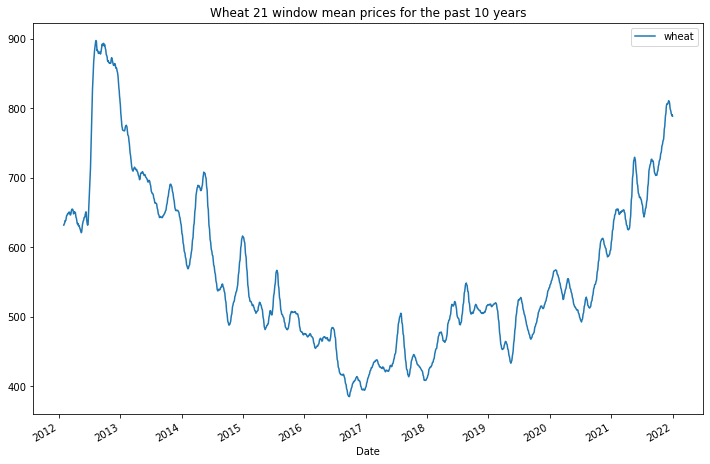

In [17]:
wheat_df.rolling(window=21).mean().plot(figsize=(12,8),title="Wheat 21 window mean prices for the past 10 years")
plt.show()

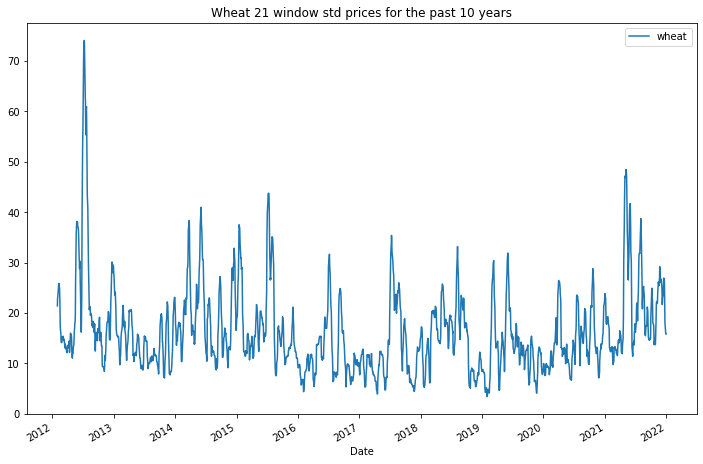

In [18]:
wheat_df.rolling(window=21).std().plot(figsize=(12,8),title="Wheat 21 window std prices for the past 10 years")
plt.show()

In [19]:
'''
21 day std on price so much volatility in prices of wheat
'''

'\n21 day std on price so much volatility in prices of wheat\n'

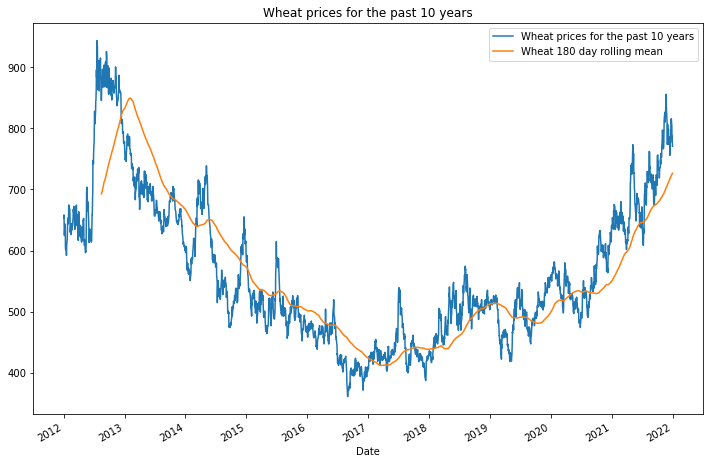

In [20]:
ax = wheat_df.plot(figsize=(12,8),title="Wheat prices for the past 10 years")
wheat_df.rolling(window = 180).mean().plot(ax=ax)
ax.legend(['Wheat prices for the past 10 years','Wheat 180 day rolling mean'])
plt.show()

In [21]:
'''
First graph is original data with noise
Second is smoothest rolling mean
'''

'\nFirst graph is original data with noise\nSecond is smoothest rolling mean\n'

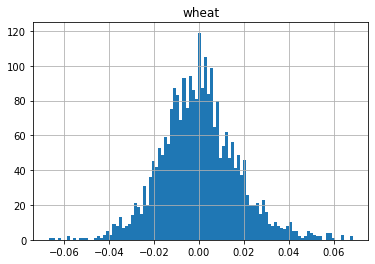

In [44]:
wheat_df.pct_change().hist(bins=100)
plt.show()

In [23]:
import pandas_montecarlo

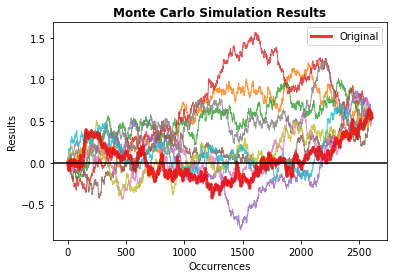

In [43]:
wheat_df['wheat'].pct_change().montecarlo(sims=10,bust=0.1,goal=1).plot()